# **Basic Rag**

I will be using a popular sentence transformer model from the HuggingFace platform  for embeddings.


[**sentence-transformers/all-MiniLM-L6-v2**](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2).
Later on, I may try out some other embeddings model, so do not forget to delete existing database as you replace models, if you will be running the notebooks.

**NB: This implementation is intended for a CPU.** So if you have a GPU you might be required to install extra packages.

Next, I will load the environment keys.

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

**Architecture**:



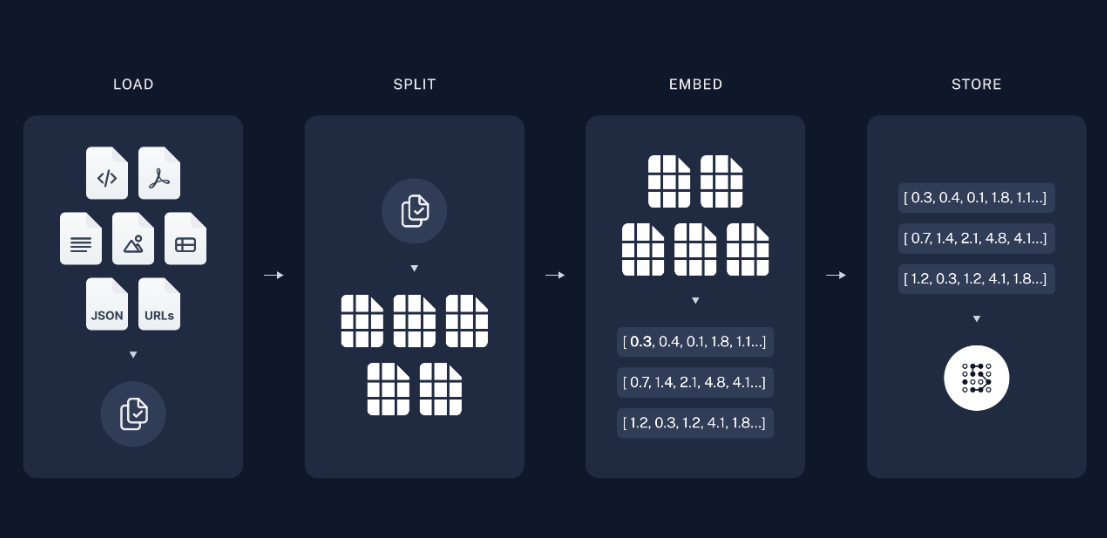


*What is RAG?*

Retrieval-Augmented Generation integrates data ingestion, indexing and retrieval for gathering and organizing information. It leverages generative models to produce contextually relevant and coherent responses. You can summarize RAG implementation in these steps: 

*   **Data ingestion** - which is the data pipeline,
*   **Indexing & retrieval** - which ensures efficient access to relevant information, and finally 
*   **generation** - which uses AI models to generate *augmented* responses which are responses based on retrieved data and conversation context.

This approach enhances chatbots' ability to provide meaningful and accurate responses during conversations, combining the strengths of both retrieval-based and generative models.

## Data Ingestion

Now I will download the PDF. I will use **requests** library from python to download the PDF using the download url.

In [10]:
# Download PDF file
import os
import requests

# Get PDF document
pdf_path = "human-nutrition-text.pdf"

# Download PDF if it doesn't already exist
if not os.path.exists(pdf_path):
  print("File doesn't exist, downloading...")

  # The URL of the PDF you want to download
  url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

  # The local filename to save the downloaded file
  filename = pdf_path

  # Send a GET request to the URL
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      # Open a file in binary write mode and save the content to it
      with open(filename, "wb") as file:
          file.write(response.content)
      print(f"The file has been downloaded and saved as {filename}")
  else:
      print(f"Failed to download the file. Status code: {response.status_code}")
else:
  print(f"File {pdf_path} exists.")

File doesn't exist, downloading...
The file has been downloaded and saved as human-nutrition-text.pdf


## Loading this PDF

Now, to load the document.

There are quite a number of options when it comes to loading PDFs on Langchain. You can read more [**here**.](https://python.langchain.com/docs/modules/data_connection/document_loaders/pdf)

Below, I will try out a number of these options to decide which one works best for this PDF. I will choose based on:
  

*   time taken to load the file, and on
*   how well structured the output is.



NB: PDF contents come in different complicated structures so there is never one loader that fits all the use cases. Of course they are mostly all good, and just need some tweaking to get them to do exactly what you want, but it is good practice to pick the option that does the job for you off-the-shelf!

##### PyPDFLoader

Starting with PyPDFLoader, i have to install pypdf:

In [3]:
! pip install -qU pypdf

In [6]:
from langchain_community.document_loaders.pdf import PyPDFLoader

# manually input the path to the PDf you want to upload.
pdf_path = input("Enter path to PDF: ")

# Create a loader instance
loader = PyPDFLoader(pdf_path)

# Load the data
text_data = loader.load()

The code above might take a while.

Inspect loaded document.

In [7]:
print(f"The document has {len(text_data)} pages")

The document has 1208 pages


In [8]:
print(text_data[5].page_content)

Lifestyles and Nutri tion 
Univ ersity of Hawai‘i a t Mānoa Food Scienc e and 
Human Nutri tion Pr ogram and H uman Nutri tion 
Program 21 
Achie ving a H ealthy Die t 
Univ ersity of Hawai‘i a t Mānoa Food Scienc e and 
Human Nutri tion Pr ogram and H uman Nutri tion 
Program 30 
Research and the Scien tific M ethod 
Univ ersity of Hawai‘i a t Mānoa Food Scienc e and 
Human Nutri tion Pr ogram and H uman Nutri tion 
Program 34 
Types o f Scien tific Studies 
Univ ersity of Hawai‘i a t Mānoa Food Scienc e and 
Human Nutri tion Pr ogram and H uman Nutri tion 
Program 41 
Part II. Chapter 2. The Human Body 
Introduc tion 
Univ ersity of Hawai‘i a t Mānoa Food Scienc e and 
Human Nutri tion Pr ogram and H uman Nutri tion 
Program 55 
Basic B iolog y, Ana tomy, and P hysiolog y 
Univ ersity of Hawai‘i a t Mānoa Food Scienc e and 
Human Nutri tion Pr ogram and H uman Nutri tion 
Program 62 
The Digestiv e System 
Univ ersity of Hawai‘i a t Mānoa Food Scienc e and 
Human Nutri tion Pr ogram 

That does not look very well arranged, I can see some spaces. I hope some other option is faster than that.

With time taken in loading document in my mind, I will time each of these loaders while they load the PDF.

In [9]:
import time

# Create an instance of the loader
loader = PyPDFLoader(input("Your PDF filepath here: "))

docs = []
start_time = time.time()  # start recrding
for doc in loader.load():
    # Process each document as needed
    docs.append(doc)
    end_time = time.time()  # end recording
    duration = end_time - start_time  # Calculate the duration in seconds

# Print the duration
print(f"Loader took {duration:.2f} seconds to load.")

Loader took 13.29 seconds to load.


That did not take too long. Let me try others.








##### PDFMiner

Next up: PDFMiner.  

In [ ]:
! pip install -qU pdfminer.six

In [1]:
from langchain_community.document_loaders import PDFMinerLoader
import time

# Create an instance of the loader
loader = PDFMinerLoader(input("Your PDF filepath here: "))

docs = []
start_time = time.time()  # start recrding
for doc in loader.load():
    # Process each document as needed
    docs.append(doc)
    end_time = time.time()  # end recording
    duration = end_time - start_time  # Calculate the duration in seconds

# Print the duration
print(f"Loader took {duration:.2f} seconds to load.")

Loader took 37.12 seconds to load.


"Nawa o". I almost fell asleep. Let me see how it performed "sef".

In [2]:
print(docs[0].page_content)

Human Nutrition: 2020 Edition 

Human Nutrition: 2020 
Edition 

UNIVERSITY  OF  HAWAI‘I  AT  MĀNOA 
FOOD  SCIENCE  AND  HUMAN 
NUTRITION  PROGRAM 

ALAN  TITCHENAL,  SKYLAR  HARA, 
NOEMI  ARCEO  CAACBAY,  WILLIAM 
MEINKE-LAU,  YA-YUN  YANG,  MARIE 
KAINOA  FIALKOWSKI  REVILLA, 
JENNIFER  DRAPER,  GEMADY 
LANGFELDER,  CHERYL  GIBBY,  CHYNA 
NICOLE  CHUN,  AND  ALLISON 
CALABRESE 

Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 
International License, except where otherwise noted. 

Contents 

Preface 

University of Hawai‘i at Mānoa Food Science and 

Human Nutrition Program and Human Nutrition 

Program 

About the Contributors 

University of Hawai‘i at Mānoa Food Science and 

Human Nutrition Program and Human Nutrition 

Program 

Acknowledgements 

University of Hawai‘i at Mānoa Food Science and 

Human Nutrition Program and Human Nutrition 

Program 

Part I. Chapte

Okay, I admit. It did a better job than PyPDFLoader but it also spent a lot of time doing it. I will try others.

##### PyPDFium2Loader

Next try: PyPDFium2Loader

In [ ]:
! pip install -qU pypdfium2

In [1]:
from langchain_community.document_loaders import PyPDFium2Loader
import time

# Create an instance of the loader
loader = PyPDFium2Loader(input("Your PDF filepath here: "))

docs = []
start_time = time.time()  # start recrding
for doc in loader.load():
    # Process each document as needed
    docs.append(doc)
    end_time = time.time()  # end recording
    duration = end_time - start_time  # Calculate the duration in seconds

# Print the duration
print(f"Loader took {duration:.2f} seconds to load.")

c:\Users\Odiaka\miniconda3\envs\devika\Lib\site-packages\pypdfium2\_helpers\textpage.py:81: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


Loader took 2.79 seconds to load.


That was fast! Is this a winner? How did it perform though...

In [2]:
print(docs[5].page_content)

Lifestyles and Nutrition 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
21 
Achieving a Healthy Diet 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
30 
Research and the Scientific Method 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
34 
Types of Scientific Studies 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
41 
Part II. Chapter 2. The Human Body 
Introduction 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
55 
Basic Biology, Anatomy, and Physiology 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
62 
The Digestive System 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
68 



Smooth!!!  More to try.

##### PyMuPDFLoader

Next try: PyMuPDFLoader.

In [4]:
! pip install -qU pymupdf

In [6]:
from langchain_community.document_loaders import PyMuPDFLoader
import time

# Create an instance of the loader
loader = PyMuPDFLoader(input("Your PDF filepath here: "))

docs = []
start_time = time.time()  # start recrding
for doc in loader.load():
    # Process each document as needed
    docs.append(doc)
    end_time = time.time()  # end recording
    duration = end_time - start_time  # Calculate the duration in seconds

# Print the duration
print(f"Loader took {duration:.2f} seconds to load.")

Loader took 1.58 seconds to load.


In [2]:
print(docs[5].page_content)

Lifestyles and Nutrition 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
21 
Achieving a Healthy Diet 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
30 
Research and the Scientific Method 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
34 
Types of Scientific Studies 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
41 
Part II. Chapter 2. The Human Body 
Introduction 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
55 
Basic Biology, Anatomy, and Physiology 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
62 
The Digestive System 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
68 



Another fast one and it looks just as decent too.

Final try.

##### PDFPlumberLoader

Final try: PDFPlumberLoader

In [ ]:
! pip install -qU pdfplumber

In [4]:
from langchain_community.document_loaders import PDFPlumberLoader
import time

# Create an instance of the loader
loader = PDFPlumberLoader(input("Your PDF filepath: "))

docs = []
start_time = time.time()  # start recrding
for doc in loader.load():
    # Process each document as needed
    docs.append(doc)
    end_time = time.time()  # end recording
    duration = end_time - start_time  # Calculate the duration in seconds

# Print the duration
print(f"Loader took {duration:.2f} seconds to load.")

Loader took 65.56 seconds to load.


*singing* wake me up... when september ends...

In [5]:
print(docs[5].page_content)

Lifestyles and Nutrition 21
University of Hawai‘i at Mānoa Food Science and
Human Nutrition Program and Human Nutrition
Program
Achieving a Healthy Diet 30
University of Hawai‘i at Mānoa Food Science and
Human Nutrition Program and Human Nutrition
Program
Research and the Scientific Method 34
University of Hawai‘i at Mānoa Food Science and
Human Nutrition Program and Human Nutrition
Program
Types of Scientific Studies 41
University of Hawai‘i at Mānoa Food Science and
Human Nutrition Program and Human Nutrition
Program
Part II. Chapter 2. The Human Body
Introduction 55
University of Hawai‘i at Mānoa Food Science and
Human Nutrition Program and Human Nutrition
Program
Basic Biology, Anatomy, and Physiology 62
University of Hawai‘i at Mānoa Food Science and
Human Nutrition Program and Human Nutrition
Program
The Digestive System 68
University of Hawai‘i at Mānoa Food Science and
Human Nutrition Program and Human Nutrition
Program



Looks good though but I won't choose that one. I will choose either **PyPDFium2Loader** or **PyMuPDFLoader**??

Let me just go with **PyMuPDFLoader**. This does not mean for every single case I will go with PyMuPDFLoader, but yes I will use it for this PDF. It seems to be very efficient.

## Indexing & retrieval

Indexing/embedding is just creating a long list of numbers that represent the loaded data and then storing this list in a vector database.

I have decided to proceed with PyMuPDFLoader, let me ensure it still works fine.

In [7]:
# Create an instance of the loader
pdf_path = input("Enter PDF path here: ")
loader = PyMuPDFLoader(pdf_path)

text_data = loader.load()

In [8]:
print(text_data[2].page_content)

Human Nutrition: 2020 
Edition 
UNIVERSITY OF HAWAI‘I AT MĀNOA 
FOOD SCIENCE AND HUMAN 
NUTRITION PROGRAM 
ALAN TITCHENAL, SKYLAR HARA, 
NOEMI ARCEO CAACBAY, WILLIAM 
MEINKE-LAU, YA-YUN YANG, MARIE 
KAINOA FIALKOWSKI REVILLA, 
JENNIFER DRAPER, GEMADY 
LANGFELDER, CHERYL GIBBY, CHYNA 
NICOLE CHUN, AND ALLISON 
CALABRESE 



That looks decent and fast too, I can work with that.












Anyway, I cannot throw everything in our database, just as it is, to the model because of context window.
Large Language models have limits on the size of texts they can ingest. For example, the sentence transformers model [**all-mpnet-base-v2**](https://huggingface.co/sentence-transformers/all-mpnet-base-v2) has an input size of **384** tokens.

This means that the model has been trained to ingest, and turn into embeddings, texts with 384 tokens (1 token ~= 4 characters ~= 0.75 words).

Texts over 384 tokens which are encoded by this model will be automatically reduced to 384 tokens in length, potentially losing some information.

Therefore, I will chunk the loaded data into manageable sizes.

To chunk these files into manageable sizes, I will be using **RecursiveCharacterTextSplitter**.

RecursiveCharacterTextSplitter is prefered option for most use cases (generic text data) because it considers natural sentence stoppages like white spaces, and new-lines. As for its parameters, I just want to maximize the token input capacity of the embedding model, and leave room for maybe 100 token overlap.

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    length_function=len,
    is_separator_regex=False)

# split the text using the text splitter.
chunks = text_splitter.split_documents(text_data)

Inspect

In [10]:
print(chunks[20].page_content)

Discovering Nutrition Facts 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
718 
Building Healthy Eating Patterns 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
740 
MyPlate Planner 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
745 
Pacific Based Dietary Guidelines 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
760 
Understanding the Bigger Picture of Dietary 
Guidelines 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
768 
Part XIII. Chapter 13. Lifespan Nutrition From 
Pregnancy to the Toddler Years 
Introduction 
University of Hawai‘i at Mānoa Food Science and 
Human Nutrition Program and Human Nutrition 
Program 
779 
Pregnancy 
University of Hawai‘i at Mānoa Food Science and


Looks good. Now I will load the embeddings model.

The embeddings model I will be using will be from HuggingFace therefore I will be requiring sentence transformers.

In [11]:
#uncomment and run block if sentence transformers is not already installed
#pip install -qU sentence_transformers

In [9]:
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings

hf = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Users\Odiaka\miniconda3\envs\devika\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


I will proceed to selecting the ideal vector storage for my embeddings.

Langchain gives quite a number of options when it comes to vector embeddings storage but I will only be comparing **chroma** against **Facebook AI Similarity Search - FAISS**.

In [16]:
! pip install -qU chromadb 
#uncomment line below if faiss-cpu is not already installed
#pip install -qU faiss-cpu

I will create 2 stores, using the object **from_documents** ; one for FAISS and the other for chroma. I will also record each process independently to determine which process ran quicker.

In [19]:
from langchain_community.vectorstores import FAISS, Chroma

start = time.time()
db_faiss = FAISS.from_documents(chunks, hf)
end = time.time()
duration = end - start
print(f"It took {duration:.2f} seconds to save the embeddings into FAISS")
print("-"*55)
start = time.time()
db_chroma = Chroma.from_documents(chunks, hf)
end = time.time()
duration = end - start
print(f"It took {duration:.2f} seconds to save the embeddings into Chroma")

It took 108.84 seconds to save the embeddings into FAISS
-------------------------------------------------------
It took 111.52 seconds to save the embeddings into Chroma


Not much of a difference in time taken to save the embeddings between the 2, but that took a lot of time.

Let me inspect them. I will query them and they will return relevant chunks.

Query both stores using **similarity_search**.

In [19]:
#query = "why are electrolytes important for fluid balance??"
similar_docs_faiss = db_faiss.similarity_search(input("Your query: "), k=5)
similar_docs_chroma = db_chroma.similarity_search(input("Your query: "), k=5)

In [21]:
for doc in similar_docs_faiss:
  n=0
  content = similar_docs_faiss[n].page_content
  print(f"Doc {n} content: {content}")
  n = n+1

Doc 0 content: Electrolytes Important for 
Fluid Balance 
UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN 
NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM 
Cells are about 75 percent water and blood plasma is about 95 
percent water. Why then, does the water not flow from blood 
plasma to cells? The force of water also known as hydrostatic 
pressure 
maintains 
the 
volumes 
of 
water 
between 
fluid 
compartments against the force of all dissolved substances. The 
concentration is the amount of particles in a set volume of water. 
(Recall that individual solutes can differ in concentration between 
the intracellular and extracellular fluids, but the total concentration 
of all dissolved substances is equal.) 
The force driving the water movement through the selectively 
permeable membrane is the higher solute concentration on the 
one side. Solutes at different concentrations on either side of a 
selectively permeable membrane exert a force, called osmotic
Doc 0 content: Electroly

In [22]:
for doc in similar_docs_chroma:
  n=0
  content = similar_docs_chroma[n].page_content
  print(f"Doc {n} content: {content}")
  n = n+1

Doc 0 content: Electrolytes Important for 
Fluid Balance 
UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN 
NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM 
Cells are about 75 percent water and blood plasma is about 95 
percent water. Why then, does the water not flow from blood 
plasma to cells? The force of water also known as hydrostatic 
pressure 
maintains 
the 
volumes 
of 
water 
between 
fluid 
compartments against the force of all dissolved substances. The 
concentration is the amount of particles in a set volume of water. 
(Recall that individual solutes can differ in concentration between 
the intracellular and extracellular fluids, but the total concentration 
of all dissolved substances is equal.) 
The force driving the water movement through the selectively 
permeable membrane is the higher solute concentration on the 
one side. Solutes at different concentrations on either side of a 
selectively permeable membrane exert a force, called osmotic
Doc 0 content: Electroly

Yes they both returned chunk of data that has some relevance to the query. But this is considered naive RAG. There's a number ways how things could go wrong.



Consider this instance:

In [21]:
# query = "Hello, how are you?"
answer_faiss = db_faiss.similarity_search(input("Your query: "))
print(f"FAISS: {answer_faiss[0].page_content}")

FAISS: Comparing Diets 
UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN 
NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM 
Diet Trends and Health 
In the past, health was regarded merely as the absence of illness. 
However, a growing understanding of the complexity and potential 
of the human condition has prompted a new way of thinking about 
health. Today, we focus on the idea of wellness, which involves a 
great deal more than just not being sick. Wellness is a state of 
optimal well-being that enables an individual to maximize their 
potential. This concept includes a host of dimensions—physical, 
mental, emotional, social, environmental, and spiritual—which affect 
one’s quality of life.1 Striving for wellness begins with an 
examination of dietary choices. 
Dietary Food Trends 
Hundreds of years ago, when food was less accessible and daily life 
required much more physical activity, people worried less about 
1. Understanding Wellness. University of Illinois at Urbana-


In [24]:
# query = "Hello, how are you?"
answer_chroma = db_chroma.similarity_search(input("Your query: "))
print(f"CHROMA: {answer_chroma[0].page_content}")


FAISS: Comparing Diets 
UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN 
NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM 
Diet Trends and Health 
In the past, health was regarded merely as the absence of illness. 
However, a growing understanding of the complexity and potential 
of the human condition has prompted a new way of thinking about 
health. Today, we focus on the idea of wellness, which involves a 
great deal more than just not being sick. Wellness is a state of 
optimal well-being that enables an individual to maximize their 
potential. This concept includes a host of dimensions—physical, 
mental, emotional, social, environmental, and spiritual—which affect 
one’s quality of life.1 Striving for wellness begins with an 
examination of dietary choices. 
Dietary Food Trends 
Hundreds of years ago, when food was less accessible and daily life 
required much more physical activity, people worried less about 
1. Understanding Wellness. University of Illinois at Urbana-


These documents returned just make no sense. 




Let me create a retriever from my vector database. 

In [11]:
retriever = db_faiss.as_retriever()

Good, now I will query my retriever

In [12]:
# Helper function for printing docs


def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )

In [27]:
#query = "why are electrolytes important for fluid balance??"
docs = retriever.get_relevant_documents(input(""))
pretty_print_docs(docs)

Document 1:

Electrolytes Important for 
Fluid Balance 
UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN 
NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM 
Cells are about 75 percent water and blood plasma is about 95 
percent water. Why then, does the water not flow from blood 
plasma to cells? The force of water also known as hydrostatic 
pressure 
maintains 
the 
volumes 
of 
water 
between 
fluid 
compartments against the force of all dissolved substances. The 
concentration is the amount of particles in a set volume of water. 
(Recall that individual solutes can differ in concentration between 
the intracellular and extracellular fluids, but the total concentration 
of all dissolved substances is equal.) 
The force driving the water movement through the selectively 
permeable membrane is the higher solute concentration on the 
one side. Solutes at different concentrations on either side of a 
selectively permeable membrane exert a force, called osmotic
--------------------------

In [29]:
#query = "How are you?"
docs = retriever.get_relevant_documents(input(""))
pretty_print_docs(docs)

Document 1:

Comparing Diets 
UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN 
NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM 
Diet Trends and Health 
In the past, health was regarded merely as the absence of illness. 
However, a growing understanding of the complexity and potential 
of the human condition has prompted a new way of thinking about 
health. Today, we focus on the idea of wellness, which involves a 
great deal more than just not being sick. Wellness is a state of 
optimal well-being that enables an individual to maximize their 
potential. This concept includes a host of dimensions—physical, 
mental, emotional, social, environmental, and spiritual—which affect 
one’s quality of life.1 Striving for wellness begins with an 
examination of dietary choices. 
Dietary Food Trends 
Hundreds of years ago, when food was less accessible and daily life 
required much more physical activity, people worried less about 
1. Understanding Wellness. University of Illinois at Urbana-
-

Yes, similarity search alone this way is pretty naive. This is very basic RAG.

Anyway, I will proceed to generating responses with these retrieved documents as context.

I will save my vector database locally

In [ ]:
db_faiss.save_local("faiss_index")

# If it is saved already and you want to load your embeddings uncomment and run
# db_faiss = FAISS.load_local("faiss_index", hf, allow_dangerous_deserialization=True)

## Generation

For this next step,  I will be using [**Ollama**](https://ollama.com/). Follow the link to learn how to set up Ollama locally. But if you want a faster inference, then uncomment and use [**Groq**](https://console.groq.com) instead. You will be required to provide your Groq API key.

In [1]:
# ! pip install -qU langchain-groq

In [2]:
#import getpass
#import os

#if "GROQ_API_KEY" not in os.environ:
#  os.environ["GROQ_API_KEY"] = getpass.getpass("Provide your Groq Api Key here: ")

In [24]:
#from langchain_core.prompts import ChatPromptTemplate
#from langchain_groq import ChatGroq

#llm = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768")
#print(llm.invoke(input("")).content)

In [13]:
from langchain_community.chat_models import ChatOllama

# LLM
llm = ChatOllama(model_name="llama2", format="json", temperature=0)

I chose the latest Llama2 model, which is about 3.8 Gigabytes of storage. Something worth considering if you will be running Ollama.

Now, I will link all steps together using a simple chain.

##### Chaining

I will be using the prebuilt function:
 ConversationalRetrievalChain. It has already been configured with the prompt that I want.

 I will also be using in-memory and chat_history capabilities to further enhance the *feel* of the conversation around the knowledge base.

In [14]:
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ChatMessageHistory, ConversationBufferMemory

message_history = ChatMessageHistory()
memory = ConversationBufferMemory(
        memory_key="chat_history",
        output_key="answer",
        chat_memory=message_history,
        return_messages=True,
    )


chain = ConversationalRetrievalChain.from_llm(
        llm,
        chain_type="stuff",
        retriever=retriever,
        memory=memory,
        return_source_documents=True,
    )

I will now test the chain

In [15]:
#query = "what are macronutrients?"

response = chain.invoke(input(""))
print(response)

{'question': 'what are macronutrients?', 'chat_history': [HumanMessage(content='what are macronutrients?'), AIMessage(content='{ "@context": "https://schema.org", "mainEntityOfPage": { "@type": "Product", "name": "Macronutrients" }, "image": { "@type": "ImageObject", "url": "https://example.com/macronutrients.jpg", "width": 600, "height": 400 } }\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')], 'answer': '{ "@context": "https://schema.org", "mainEntityOfPage": { "@type": "Product", "name": "Macronutrients" }, "image": { "@type": "ImageObject", "url": "https://example.com/macronutrients.jpg", "width": 600, "height": 400 } }\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'source_documents': [Document(page_content='There are sixteen essential minerals and thirteen vitamins (See \nTable 1.1 “Minerals and Their Major Functions” and Table 1.2 \n“Vitamins and Their Major Functions” for a complete list and their \nmajor functions). In contrast to carbohydrates

In [16]:
#query = "and what are those required in small amounts called?"
response = chain.invoke(input(""))
print(response["answer"])

{ "small amounts of nutrients" : "micronutrients" }


In [17]:
#query = "Hi, how are you?"
response = chain.invoke(input(""))
print(response["answer"])

{ "Micronutrients" : "The small amounts of nutrients called micronutrients play a crucial role in maintaining overall health and well-being. They include all the essential minerals and vitamins, which are required by the body in lesser amounts but are still essential for carrying out bodily functions." }


See? Though it works some of the time, but it doesn't work all of the time, and there are issues. You will find that selecting better models will cause some improvement on the response generated, or even a little prompt engineering. Nonetheless - a couple of things to point out:

### **Issues**

*   *similarity_search* alone does not always work. And this largely affects the response of the chatbot. I would prefer a more *guided* response; one that is more carefully reasoned. When asked about its emotions or feelings, it says something like "I am a LLM I don't have feelings" or "I don't know". 
In addition to that, I dont know of how much help the documents returned above will be in terms of context to the generator LLM. I am going to be needing something roburst and practical, for this retrieval process, other than *stuff* as chain_type. If I keep making those API calls with each question, the list of context keeps growing and might fill up the context window. At least, I require some reordering and ranking of the chunks in terms of relevance so that the generator llm is not overwhelmed with less relevant documents.
*   Also, you can see the generator llm hallucinated with the source returned. It will be nice if the response from the llm contains actual verifiable *sources/metadata*, which in this use case, can be in the form of source documents.
That way I am sure, very sure, that the LLM is responding from the knowledge base I created and not hallucinating.


I will now try to improve upon some of these issues using better and more advanced RAG techniques.